Text(0, 0.5, 'sum of the intensity')

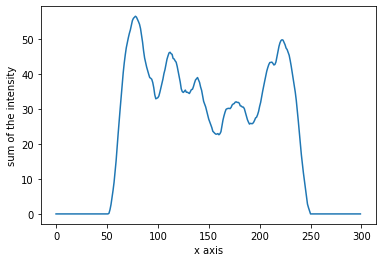

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.signal import convolve, find_peaks

img=io.imread('696_100balls_noverlap_12_6.tiff')


## img size= 200*300*200

# summation of the intensity
a=np.sum(img,axis=2)
a=np.sum(a,axis=0)
a=a/200
plt.plot(a)

plt.xlabel('x axis')
plt.ylabel('sum of the intensity')


## Data loading is finished

[63]
1st peak = 63


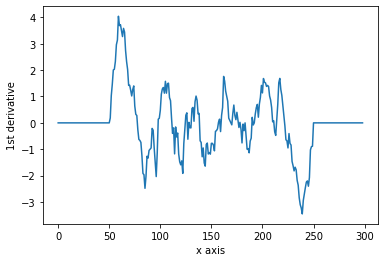

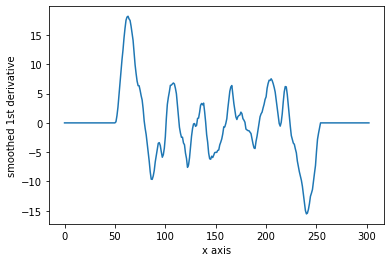

In [2]:
## Find 1st peak
def derivative(y):
    der=[]
    for i in range(1,len(y)):

        diff_y=y[i]-y[i-1]
        diff_x=1
        diff=diff_y/diff_x
        der.append(diff)
    return der

der1=derivative(a)
plt.plot(der1)
plt.xlabel('x axis')
plt.ylabel('1st derivative')
der1_smoothed_5=convolve(der1,np.ones(5))
plt.figure()
plt.plot(der1_smoothed_5)
plt.xlabel('x axis')
plt.ylabel('smoothed 1st derivative')
peaks, properties=find_peaks(der1_smoothed_5, height=15)
plt.plot(peaks,der1_smoothed_5[peaks])
print(peaks)
peak1=peaks[0]
print('1st peak = {}'.format(peak1))

[ 87  97 116 122 145 147 151 189 240]
2nd peak is 240


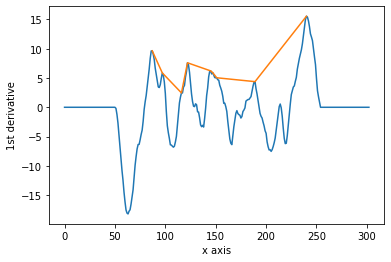

In [3]:
# Find the 2nd peak
# 2nd peak should be the 'negative' peak
# Inverse the der1_smoothed_5 to get the maximum negative peak
der1_smoothed_inv=-der1_smoothed_5
plt.figure()
plt.plot(der1_smoothed_inv)
plt.xlabel('x axis')
plt.ylabel('1st derivative')
peaks, properties=find_peaks(der1_smoothed_inv,height=1)
print(peaks)
plt.plot(peaks,der1_smoothed_inv[peaks])
peak2=peaks[-1]
print('2nd peak is {}'.format(peak2))

The peaks are 63 and 240.


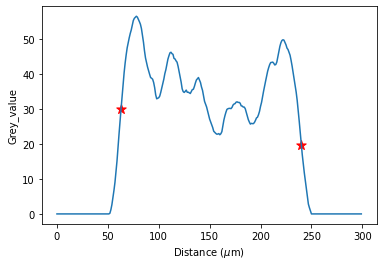

In [4]:
#
plt.figure()
plt.plot(a)
plt.xlabel('Distance ($\mu$m)')
plt.ylabel('Grey_value')
# peak=[peak1,peak2]
# plt.plot(peak,a[peak])
plt.scatter(peak1,a[peak1],s=100,marker='*',color='r')
plt.scatter(peak2,a[peak2],s=100,marker='*',color='r')
print('The peaks are {} and {}.'.format(peak1,peak2))

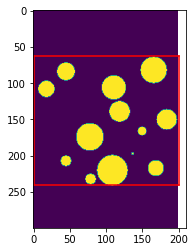

In [16]:
plt.figure()
plt.imshow(img[150])

plt.plot([0, 200], [peak1, peak1],'r')
plt.plot([0, 200], [peak2, peak2],'r')
plt.plot([0, 0], [peak1, peak2],'r')
plt.plot([200, 200], [peak1, peak2],'r')